In [20]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,Input, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from keras.models import Sequential
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.callbacks import Callback 
from livelossplot import PlotLossesKeras 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam



In [2]:
data_dir = r"C:\Base_Camp\Pliki\archive"
datagen = ImageDataGenerator(rescale = 1.0/255.0, validation_split = 0.2)

In [3]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 28711 images belonging to 2 classes.
Found 7176 images belonging to 2 classes.


In [26]:
model = Sequential([
    Input(shape=(48, 48, 3)),
    Conv2D(32, (3, 3), activation='relu' ),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), 
    
    Conv2D(64, (3, 3), activation='relu' ,padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), 

    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), 

    Conv2D(256, (3, 3), activation='relu' ,padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), 
    
    Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'),  # Dodana warstwa
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])


ValueError: Computed output size would be negative. Received `inputs shape=(None, 1, 1, 512)`, `kernel shape=(3, 3, 512, 512)`, `dilation_rate=[1 1]`.

In [10]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])


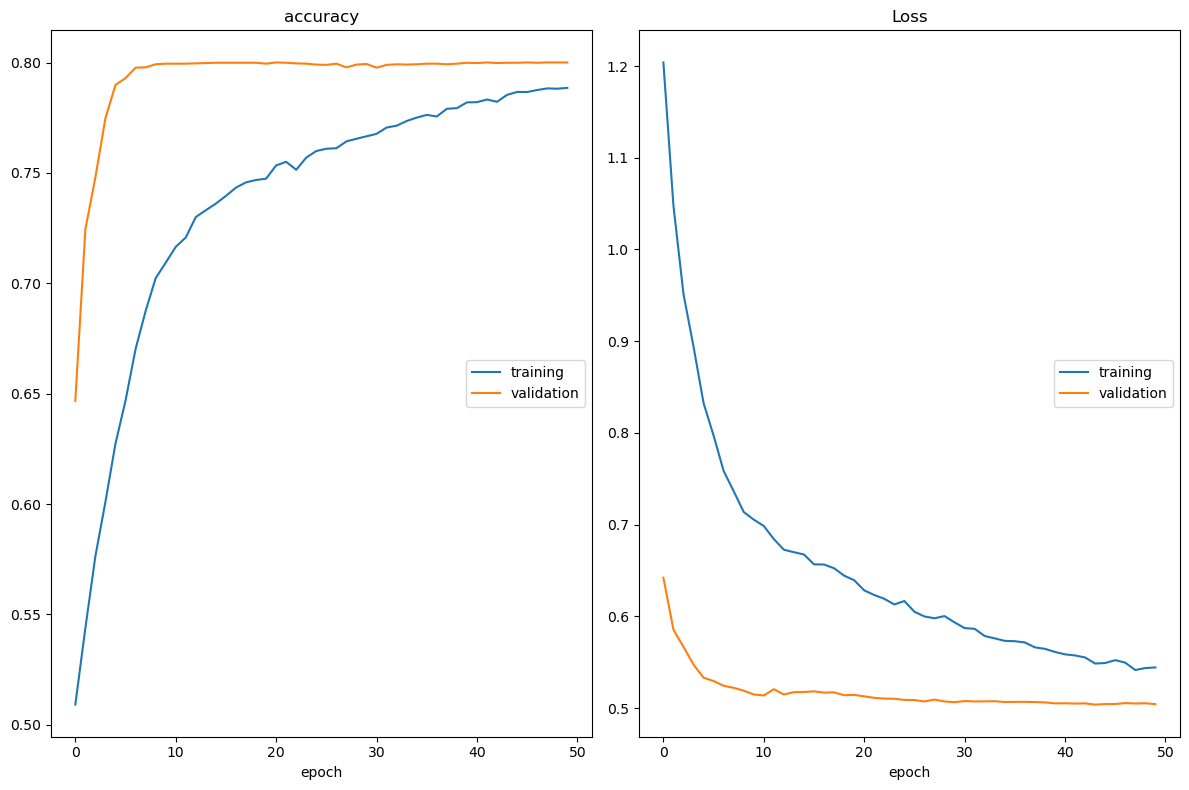

accuracy
	training         	 (min:    0.509, max:    0.789, cur:    0.789)
	validation       	 (min:    0.647, max:    0.800, cur:    0.800)
Loss
	training         	 (min:    0.542, max:    1.204, cur:    0.544)
	validation       	 (min:    0.504, max:    0.642, cur:    0.504)
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 158ms/step - accuracy: 0.7892 - loss: 0.5456 - val_accuracy: 0.8000 - val_loss: 0.5044


In [12]:
history = model.fit(
    train_generator,
    epochs=50,
    callbacks=[PlotLossesKeras()],
    validation_data=validation_generator
)

In [16]:

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def predict_emotion(face_image, model):
    face_image = cv2.resize(face_image, (48, 48))
    face_image = cv2.cvtColor(face_image, cv2.COLOR_GRAY2RGB)  
    face_image = face_image / 255.0
    face_image = np.expand_dims(face_image, 0)  
    predictions = model.predict(face_image)
    return emotion_labels[np.argmax(predictions)]

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        emotion = predict_emotion(face, model)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    cv2.imshow('Emotion Recognition', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━